In [117]:
import pandas as pd

df = pd.read_csv('loan_data_2007_2014.csv')
# df.columns

C:\Users\Fikri Budianto\AppData\Local\Temp\ipykernel_19820\949470758.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


In [118]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'

# 1. Calculate the sum of missing (null) values for every column.
#    df.isnull() creates a DataFrame of True/False (True = missing).
#    .sum() adds the True values (which are treated as 1) column-wise.
null_counts = df.isnull().sum()

# 2. Sort the resulting Series from lowest to highest count.
#    (ascending=True is the default but specified here for clarity)
null_counts_sorted = null_counts.sort_values(ascending=True)

print("--- Missing Values per Column (Sorted Ascending) ---")
print(null_counts_sorted.head(50))

--- Missing Values per Column (Sorted Ascending) ---
Unnamed: 0                        0
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
home_ownership                    0
verification_status               0
pymnt_plan                        0
loan_status                       0
issue_d                           0
purpose                           0
zip_code                          0
dti                               0
url                               0
addr_state                        0
last_pymnt_amnt                   0
collection_recovery_fee           0
recoveries                        0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_i

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting style
sns.set_style("whitegrid")

def plot_numerical_distributions(df, columns):
    """Generates KDE and Box Plots for specified numerical columns."""
    print("Generating KDE and Box Plots for Numerical Columns...")

    for col in columns:
        plt.figure(figsize=(12, 8))
        
        # 1. KDE Plot (Top Panel)
        plt.subplot(2, 1, 1) 
        sns.kdeplot(df[col], fill=True, color='skyblue', alpha=0.6, linewidth=2)
        plt.title(f'Distribution (KDE) of {col}', fontsize=14)
        plt.xlabel('')
        plt.grid(axis='y', linestyle='--', alpha=0.5)

        # 2. Box Plot (Bottom Panel)
        plt.subplot(2, 1, 2)
        sns.boxplot(x=df[col], color='salmon', orient='h', width=0.5)
        
        # Calculate IQR for outlier reference
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Identify extreme outliers (optional, but informative)
        extreme_outliers = df[col][(df[col] < (Q1 - 3 * IQR)) | (df[col] > (Q3 + 3 * IQR))]
        
        plt.title(f'Box Plot of {col} (Median={df[col].median():.2f})', fontsize=14)
        plt.xlabel(col)
        
        # Add a note on the number of extreme outliers
        if not extreme_outliers.empty:
             plt.text(0.95, 0.05, f'Extreme Outliers: {len(extreme_outliers)}', 
                      transform=plt.gca().transAxes, ha='right', fontsize=10, color='darkred')
        
        plt.tight_layout()
        plt.show()

def plot_categorical_frequencies(df, columns):
    """Generates Bar Plots for specified categorical columns, sorted by frequency."""
    print("\nGenerating Bar Plots for Categorical Columns...")

    for col in columns:
        # Calculate frequency counts and sort them
        counts = df[col].value_counts().reset_index()
        counts.columns = [col, 'Count']
        
        plt.figure(figsize=(10, 6))
        
        # Use a bar plot (Count Plot equivalent with Seaborn)
        sns.barplot(
            x='Count', 
            y=col, 
            data=counts, 
            palette='viridis',
            edgecolor='black'
        )
        
        plt.title(f'Frequency of {col}', fontsize=14)
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.grid(axis='x', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()


In [120]:
import numpy as np
import pandas as pd

# Load or create your DataFrame here (e.g., df = pd.read_csv('data.csv'))

# Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Categorical Columns (including generic string/text 'object' types)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("--- Data Type Separation ---")
print(f"Total Columns: {len(df.columns)}")
print(f"Numerical Columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")

--- Data Type Separation ---
Total Columns: 75
Numerical Columns (53): ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
Categorical Columns (22): ['term', 'grade', 'sub_grade', '

### EDA

1. How does the borrower's revolving line utilization rate (revol_util) and the total available revolving high credit limit (total_rev_hi_lim) influence the ultimate loan status (loan_status) and the assessed interest rate (int_rate)?

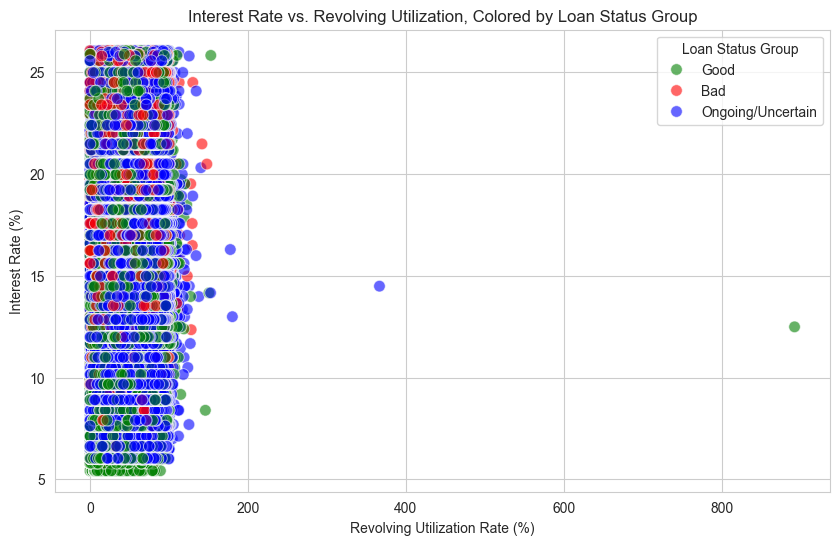

C:\Users\Fikri Budianto\AppData\Local\Temp\ipykernel_19820\433303356.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


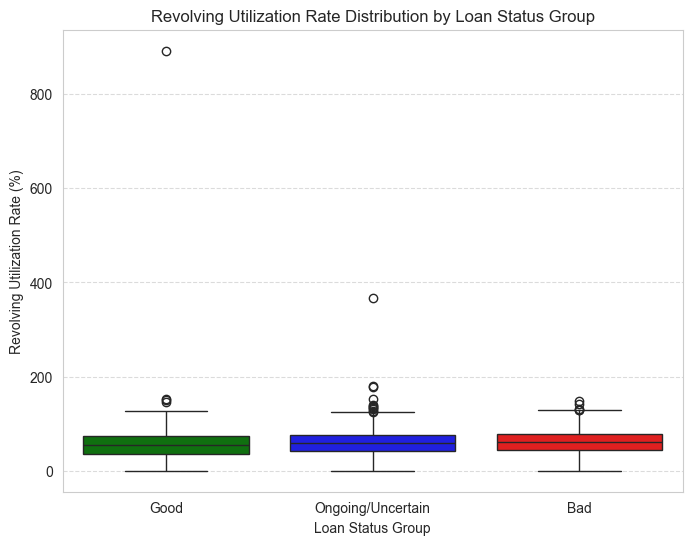

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Data Cleaning: Grouping the Loan Status (CRUCIAL STEP) ---

# Define the comprehensive status mapping based on the provided unique values
status_map = {
    # Good/Successful Loans
    'Fully Paid': 'Good',
    'Does not meet the credit policy. Status:Fully Paid': 'Good',
    
    # Bad/Defaulted Loans
    'Charged Off': 'Bad',
    'Default': 'Bad',
    'Late (31-120 days)': 'Bad',
    'Late (16-30 days)': 'Bad',
    'Does not meet the credit policy. Status:Charged Off': 'Bad',
    
    # Ongoing/Uncertain Loans (Cannot determine outcome yet)
    'Current': 'Ongoing/Uncertain',
    'In Grace Period': 'Ongoing/Uncertain',
}

# APPLY THIS MAPPING TO YOUR DATAFRAME:
df['loan_status_group'] = df['loan_status'].map(status_map)

# Define order and colors for consistency
group_order = ['Good', 'Ongoing/Uncertain', 'Bad']
group_palette = {'Good': 'green', 'Bad': 'red', 'Ongoing/Uncertain': 'blue'}
# ----------------------------------------------------------------------


# --- Visualization 1: Scatter Plot (Utilization vs. Interest Rate, by Group) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='revol_util', # Assumes you have run the cleaning code to get this float column
    y='int_rate',   # Assumes you have run the cleaning code to get this float column
    hue='loan_status_group', 
    data=df,
    palette=group_palette,
    alpha=0.6,
    s=70
)
plt.title('Interest Rate vs. Revolving Utilization, Colored by Loan Status Group')
plt.xlabel('Revolving Utilization Rate (%)')
plt.ylabel('Interest Rate (%)')
plt.legend(title='Loan Status Group')
plt.show()

# --- Visualization 2: Box Plot (Utilization Distribution by Group) ---
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='loan_status_group', 
    y='revol_util', 
    data=df, 
    order=group_order,
    palette=group_palette
)
plt.title('Revolving Utilization Rate Distribution by Loan Status Group')
plt.xlabel('Loan Status Group')
plt.ylabel('Revolving Utilization Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. Which Loan Grades (grade) yield the highest revenue (Interest Received: total_rec_int) and which incur the largest losses (Recoveries)? How does this balance affect overall profitability per grade?

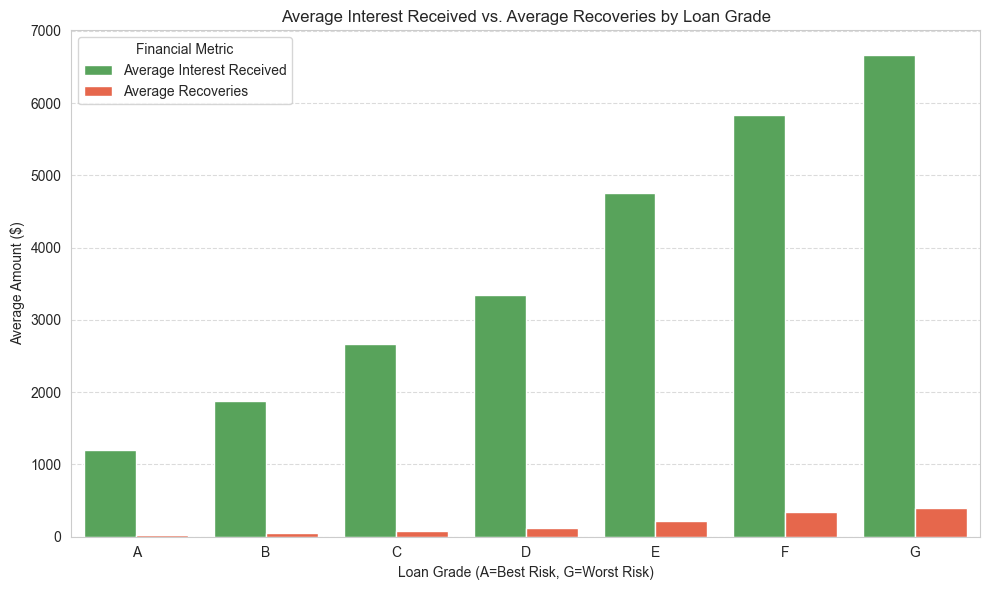

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Data Aggregation: Calculate Mean Interest and Mean Recoveries per Grade ---

# Define the conventional order for the grades (A=Best Risk, G=Worst Risk)
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Group by grade and calculate the mean of the two financial metrics
profit_metrics = df.groupby('grade')[['total_rec_int', 'recoveries']].mean().reset_index()

# Ensure the grades are sorted in the correct order for plotting
profit_metrics['grade'] = pd.Categorical(profit_metrics['grade'], categories=grade_order, ordered=True)
profit_metrics = profit_metrics.sort_values('grade')

# Rename columns for better plot readability
profit_metrics.columns = ['Grade', 'Average Interest Received', 'Average Recoveries']

# --- 2. Visualization: Grouped Bar Chart ---

# Melt the DataFrame to long format, which is required by seaborn for grouped bar charts
df_long = profit_metrics.melt('Grade', var_name='Metric', value_name='Amount')

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Grade',
    y='Amount',
    hue='Metric',
    data=df_long,
    palette=['#4CAF50', '#FF5733'] # Green for Interest, Red for Recoveries
)

plt.title('Average Interest Received vs. Average Recoveries by Loan Grade')
plt.xlabel('Loan Grade (A=Best Risk, G=Worst Risk)')
plt.ylabel('Average Amount ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Financial Metric')
plt.tight_layout()
plt.show()

3. Which states (addr_state) represent the highest volume of loans funded, and which states exhibit a disproportionately high default rate (Charged Off)?

C:\Users\Fikri Budianto\AppData\Local\Temp\ipykernel_19820\997667487.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


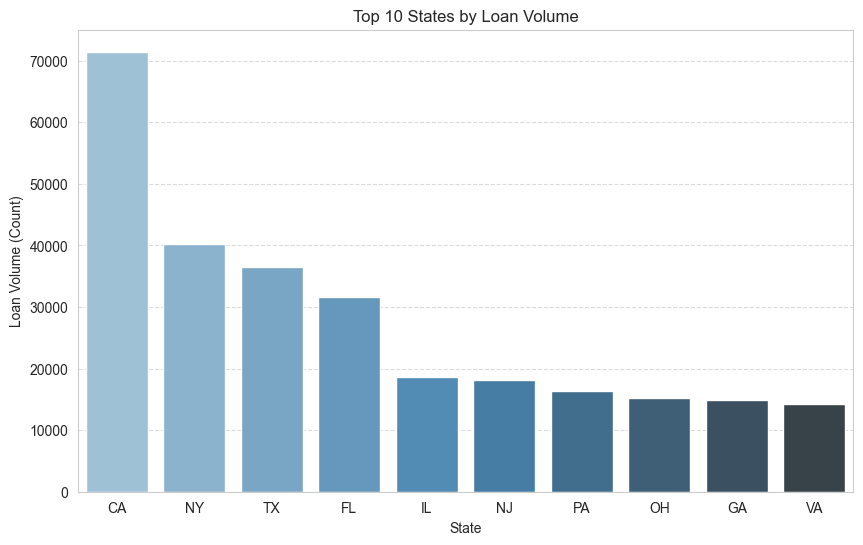

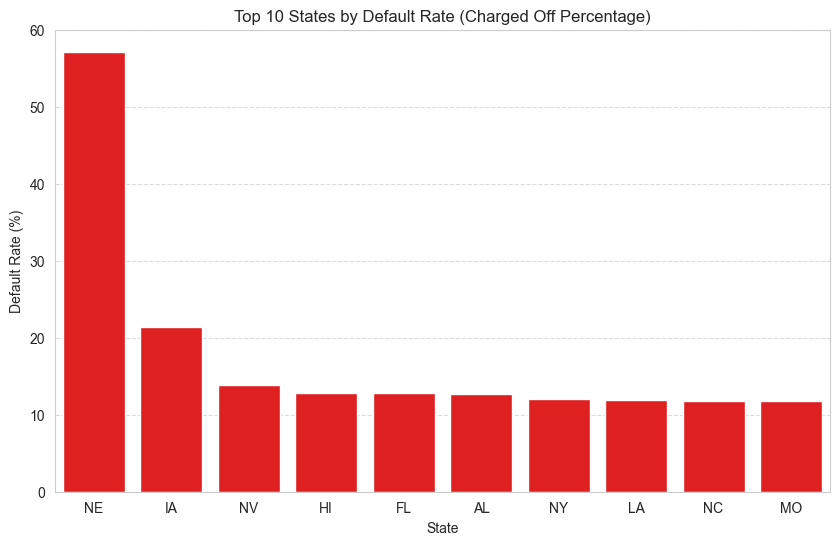

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Data Cleaning: Grouping the Loan Status ---
# This reuses the grouping logic from Question 1
status_map = {
    'Fully Paid': 'Good',
    'Does not meet the credit policy. Status:Fully Paid': 'Good',
    'Charged Off': 'Bad',
    'Default': 'Bad',
    'Late (31-120 days)': 'Bad',
    'Late (16-30 days)': 'Bad',
    'Does not meet the credit policy. Status:Charged Off': 'Bad',
    'Current': 'Ongoing/Uncertain',
    'In Grace Period': 'Ongoing/Uncertain',
}
# Assuming your DataFrame 'df' and a temporary 'loan_status_group' column
# df['loan_status_group'] = df['loan_status'].map(status_map).fillna('Other')


# --- 2. Visualization 1: Top 10 States by Loan Volume ---
volume_by_state = df['addr_state'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=volume_by_state.index,
    y=volume_by_state.values,
    palette='Blues_d'
)
plt.title('Top 10 States by Loan Volume')
plt.xlabel('State')
plt.ylabel('Loan Volume (Count)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# --- 3. Analysis 2: Default Rate by State ---
# Calculate the count of each status group per state
state_stats = df.groupby('addr_state')['loan_status_group'].value_counts().unstack(fill_value=0)
state_stats['Total Loans'] = state_stats.sum(axis=1)

# Calculate Default Rate: (Bad Loans / Total Loans) * 100
state_stats['Default Rate (%)'] = (state_stats['Bad'] / state_stats['Total Loans']) * 100

# Select the top 10 states by Default Rate
default_rate_top_10 = state_stats['Default Rate (%)'].nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=default_rate_top_10.index,
    y=default_rate_top_10.values,
    color='red'
)
plt.title('Top 10 States by Default Rate (Charged Off Percentage)')
plt.xlabel('State')
plt.ylabel('Default Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. Are loans with high Debt-to-Income Ratios (dti) significantly more likely to end in default (Charged Off)?

C:\Users\Fikri Budianto\AppData\Local\Temp\ipykernel_19820\3234660751.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


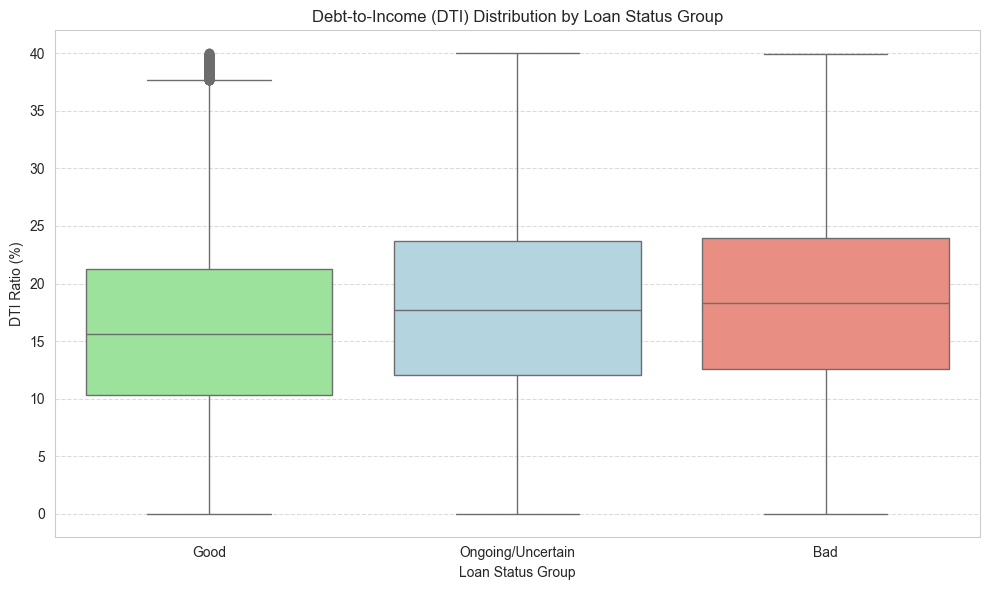

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Data Cleaning: Grouping the Loan Status ---
# This reuses the grouping logic from Question 1 to create the target variable
status_map = {
    'Fully Paid': 'Good',
    'Does not meet the credit policy. Status:Fully Paid': 'Good',
    'Charged Off': 'Bad',
    'Default': 'Bad',
    'Late (31-120 days)': 'Bad',
    'Late (16-30 days)': 'Bad',
    'Does not meet the credit policy. Status:Charged Off': 'Bad',
    'Current': 'Ongoing/Uncertain',
    'In Grace Period': 'Ongoing/Uncertain',
}
# Assuming your DataFrame 'df' has the original 'loan_status' and you run this:
# df['loan_status_group'] = df['loan_status'].map(status_map).fillna('Other')

# Define plot order and colors
group_order = ['Good', 'Ongoing/Uncertain', 'Bad']
group_palette = {'Good': 'lightgreen', 'Bad': 'salmon', 'Ongoing/Uncertain': 'lightblue'}


# --- 2. Visualization: Box Plot (DTI Distribution by Status Group) ---
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='loan_status_group',
    y='dti',
    data=df,
    order=group_order,
    palette=group_palette
)
plt.title('Debt-to-Income (DTI) Distribution by Loan Status Group')
plt.xlabel('Loan Status Group')
plt.ylabel('DTI Ratio (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Fikri Budianto\AppData\Local\Temp\ipykernel_19820\1896868971.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


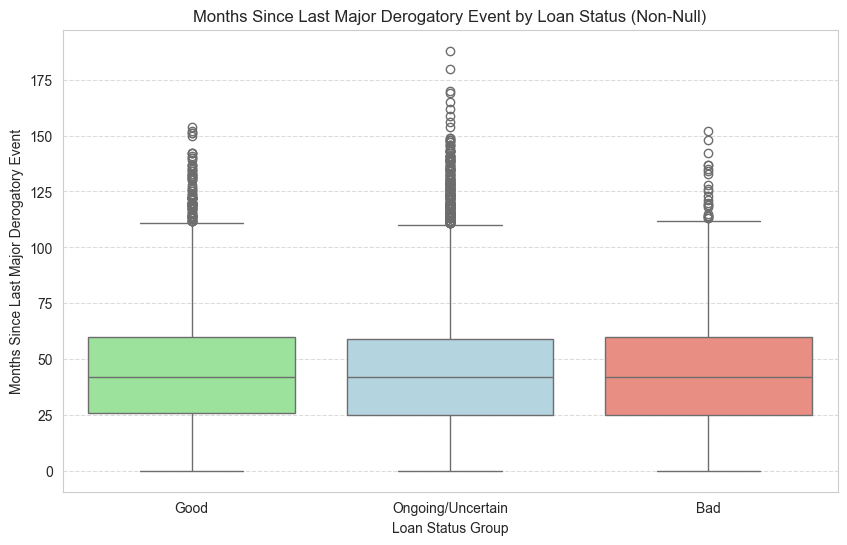

<Figure size 800x600 with 0 Axes>

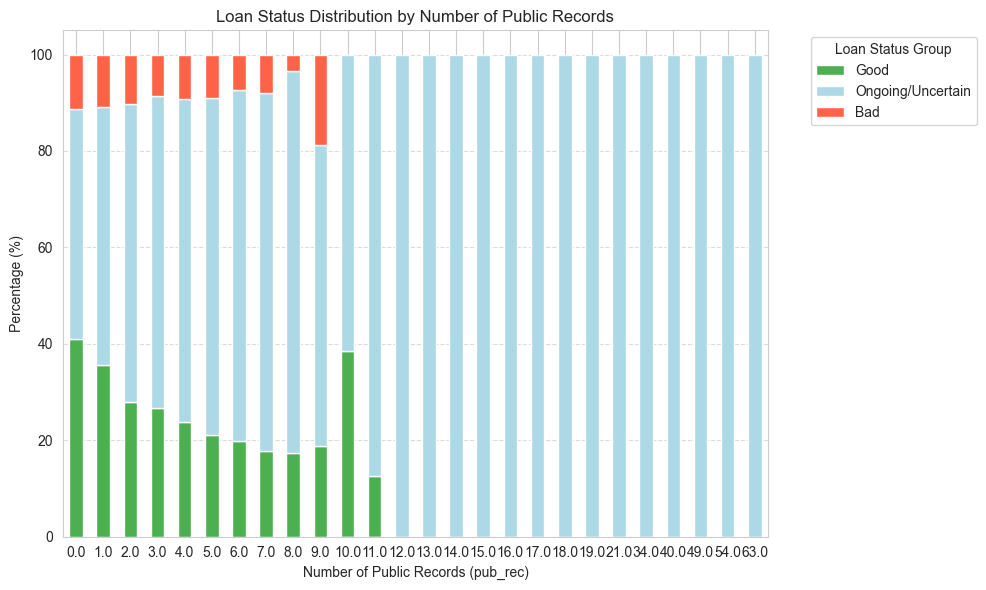

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Data Cleaning: Grouping the Loan Status ---
# This reuses the grouping logic from previous questions
status_map = {
    'Fully Paid': 'Good',
    'Does not meet the credit policy. Status:Fully Paid': 'Good',
    'Charged Off': 'Bad',
    'Default': 'Bad',
    'Late (31-120 days)': 'Bad',
    'Late (16-30 days)': 'Bad',
    'Does not meet the credit policy. Status:Charged Off': 'Bad',
    'Current': 'Ongoing/Uncertain',
    'In Grace Period': 'Ongoing/Uncertain',
}
# Assuming your DataFrame 'df' has the original 'loan_status' and you run this:
# df['loan_status_group'] = df['loan_status'].map(status_map).fillna('Other')

group_order = ['Good', 'Ongoing/Uncertain', 'Bad']
group_palette = {'Good': 'lightgreen', 'Bad': 'salmon', 'Ongoing/Uncertain': 'lightblue'}


# --- 2. Visualization 1: Box Plot for mths_since_last_major_derog ---
# Only plot rows where the month count is available (non-null)
df_non_null = df.dropna(subset=['mths_since_last_major_derog']).copy()

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='loan_status_group',
    y='mths_since_last_major_derog',
    data=df_non_null,
    order=group_order,
    palette=group_palette
)
plt.title('Months Since Last Major Derogatory Event by Loan Status (Non-Null)')
plt.xlabel('Loan Status Group')
plt.ylabel('Months Since Last Major Derogatory Event')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# --- 3. Visualization 2: Stacked Bar Chart for pub_rec ---
# Calculate status percentage breakdown for each pub_rec count
pub_rec_pivot = df.groupby('pub_rec')['loan_status_group'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
pub_rec_pivot = pub_rec_pivot.pivot(index='pub_rec', columns='loan_status_group', values='percent').fillna(0)

# Sort columns for consistent stacking and color
pub_rec_pivot = pub_rec_pivot[group_order]

plt.figure(figsize=(8, 6))
pub_rec_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#4CAF50', '#ADD8E6', '#FF6347'] # Green, Light Blue, Red
)

plt.title('Loan Status Distribution by Number of Public Records')
plt.xlabel('Number of Public Records (pub_rec)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Loan Status Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Data Preprocessing

In [127]:
df_classif = pd.read_csv('loan_data_2007_2014.csv')
df_classif.info()

C:\Users\Fikri Budianto\AppData\Local\Temp\ipykernel_19820\3006303092.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_classif = pd.read_csv('loan_data_2007_2014.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [128]:
df_classif = df_classif.drop_duplicates()
df_classif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [129]:
import pandas as pd

# 1. Define the percentage threshold for KEEPING non-null data
# To KEEP columns with *at least* 20% non-nulls (i.e., drop those with > 80% nulls)
null_threshold = 0.80 
non_null_percent_to_keep = 1 - null_threshold  # This equals 0.20 (20%)

# 2. Calculate the required minimum number of non-null values
min_non_nulls = int(df_classif.shape[0] * non_null_percent_to_keep)

# 3. Drop columns that do NOT meet this threshold
df_classif = df_classif.dropna(
    axis=1,             # Operate on columns
    thresh=min_non_nulls # Only keep columns with at least this many non-null values
)

print(f"Original columns: {df_classif.shape[1]}")
print(f"Columns dropped _cladf_classifif < {non_null_percent_to_keep*100:.0f}% non-null.")

Original columns: 57
Columns dropped _cladf_classifif < 20% non-null.


In [130]:
import numpy as np
import pandas as pd

# Load or create your DataFrame here (e.g., df_classif = pd.read_csv('data.csv'))

# Numerical Columns
numerical_cols = df_classif.select_dtypes(include=np.number).columns.tolist()

# Categorical Columns (including generic string/text 'object' types)
categorical_cols = df_classif.select_dtypes(include=['object', 'category']).columns.tolist()

print("--- Data Type Separation ---")
print(f"Total Columns: {len(df_classif.columns)}")
print(f"Numerical Columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")

--- Data Type Separation ---
Total Columns: 57
Numerical Columns (35): ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
Categorical Columns (22): ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']


In [131]:
# List of high-cardinality columns to drop (excluding date and zip_code)
columns_to_drop = [
    'url',         # 466,285 unique values (Link/ID)
    'emp_title',   # 205,475 unique values (Too many unique job titles)
    'desc',        # 124,435 unique values (Free text/Noise)
    'title',        # 63,098 unique values (Free text/Redundant with 'purpose')
    'application_type',
    'pymnt_plan',
]

# Drop the columns from the DataFrame (use axis=1 for columns)
df_classif = df_classif.drop(columns=columns_to_drop, axis=1)

print(f"Dropped {len(columns_to_drop)} columns.")
print(f"New DataFrame shape: {df_classif.shape}")

Dropped 6 columns.
New DataFrame shape: (466285, 51)


In [132]:
import numpy as np
import pandas as pd

# Load or create your DataFrame here (e.g., df_classif = pd.read_csv('data.csv'))

# Numerical Columns
numerical_cols = df_classif.select_dtypes(include=np.number).columns.tolist()

# Categorical Columns (including generic string/text 'object' types)
categorical_cols = df_classif.select_dtypes(include=['object', 'category']).columns.tolist()

print("--- Data Type Separation ---")
print(f"Total Columns: {len(df_classif.columns)}")
print(f"Numerical Columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")

--- Data Type Separation ---
Total Columns: 51
Numerical Columns (35): ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
Categorical Columns (16): ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


In [133]:
# Calculate the median for all numerical columns in one go
numerical_medians = df_classif[numerical_cols].median()

# Apply the median imputation
df_classif[numerical_cols] = df_classif[numerical_cols].fillna(numerical_medians)

# Verification (optional): Check if nulls remain in numerical columns
# print("\nNull count after numerical imputation:")
# print(df_classif[numerical_cols].isnull().sum().nlargest(5))

# Calculate the mode for all categorical columns.
# Since .mode() returns a Series (as there can be multiple modes),
# we take the first element [0] for a single imputation value.
categorical_modes = {col: df_classif[col].mode()[0] for col in categorical_cols}

# Apply the mode imputation
df_classif[categorical_cols] = df_classif[categorical_cols].fillna(categorical_modes)

# Verification (optional): Check if nulls remain in categorical columns
# print("\nNull count after categorical imputation:")
# print(df_classif[categorical_cols].isnull().sum().nlargest(5))

In [134]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# --- 1. Identify Numerical Columns ---
# # Assuming you have already imputed and cleaned your data
# numerical_cols = df_classif.select_dtypes(include=np.number).columns.tolist()

# --- 2. Apply Standardization (Z-Score) ---
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_classif[numerical_cols] = scaler.fit_transform(df_classif[numerical_cols])
df_classif

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-1.732047,-1.101759,-1.138560,-1.124392,-1.122963,-1.114455,36 months,-0.729587,-1.105575,B,...,-0.531492,Feb-16,Jan-16,-0.083608,-0.018121,0.0,-0.058307,-0.012089,-0.343273,-0.186939
1,-1.732040,-1.101765,-1.137056,-1.426088,-1.425101,-1.412732,60 months,0.330634,-1.528763,C,...,-0.540846,Feb-16,Sep-13,-0.083608,-0.018121,0.0,-0.058307,-0.012089,-0.343273,-0.186939
2,-1.732032,-1.101789,-1.137111,-1.438156,-1.437186,-1.424784,36 months,0.488979,-1.428140,C,...,-0.445387,Feb-16,Jan-16,-0.083608,-0.018121,0.0,-0.058307,-0.012089,-0.343273,-0.186939
3,-1.732025,-1.101817,-1.140222,-0.521001,-0.518687,-0.508860,36 months,-0.077850,-0.380931,C,...,-0.498032,Feb-16,Jan-15,-0.083608,-0.018121,0.0,-0.058307,-0.012089,-0.343273,-0.186939
4,-1.732017,-1.101955,-1.137263,-1.365749,-1.364673,-1.352474,60 months,-0.261438,-1.496071,B,...,-0.550184,Feb-16,Jan-16,-0.083608,-0.018121,0.0,-0.058307,-0.012089,-0.343273,-0.186939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1.732017,-0.411345,-1.126201,0.492696,0.496497,0.503478,60 months,0.147046,0.002377,C,...,-0.484501,Feb-16,Jan-16,-0.083608,-0.018121,0.0,-0.058307,-0.012089,1.163432,0.019261
466281,1.732025,-0.311651,-0.262003,0.927137,0.931576,0.937336,60 months,1.409214,0.617856,D,...,-0.559237,Feb-16,Jan-16,-0.083608,-0.018121,0.0,-0.058307,-0.012089,0.646974,0.295162
466282,1.732032,-0.320823,-0.270557,0.770256,0.774464,0.780665,60 months,0.725348,0.337921,D,...,-0.469793,Feb-16,Dec-15,-0.083608,-0.018121,0.0,-0.058307,-0.012089,-0.399324,-0.468649
466283,1.732040,-0.318978,-0.268838,-1.486427,-1.485528,-1.472991,36 months,-1.360671,-1.517427,A,...,-0.292225,Feb-16,Apr-15,-0.083608,-0.018121,0.0,-0.058307,-0.012089,3.257074,0.693041


In [135]:
df_classif[categorical_cols]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,36 months,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,Jan-85,f,Jan-15,Feb-16,Jan-16
1,60 months,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,309xx,GA,Apr-99,f,Apr-13,Feb-16,Sep-13
2,36 months,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,Nov-01,f,Jun-14,Feb-16,Jan-16
3,36 months,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,917xx,CA,Feb-96,f,Jan-15,Feb-16,Jan-15
4,60 months,B,B5,1 year,RENT,Source Verified,Dec-11,Current,other,972xx,OR,Jan-96,f,Jan-16,Feb-16,Jan-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,60 months,C,C2,4 years,MORTGAGE,Source Verified,Jan-14,Current,debt_consolidation,773xx,TX,Apr-03,w,Jan-16,Feb-16,Jan-16
466281,60 months,D,D5,10+ years,MORTGAGE,Verified,Jan-14,Charged Off,debt_consolidation,377xx,TN,Jun-97,f,Dec-14,Feb-16,Jan-16
466282,60 months,D,D1,7 years,MORTGAGE,Verified,Jan-14,Current,debt_consolidation,458xx,OH,Dec-01,f,Jan-16,Feb-16,Dec-15
466283,36 months,A,A4,3 years,OWN,Verified,Jan-14,Fully Paid,credit_card,913xx,CA,Feb-03,w,Dec-14,Feb-16,Apr-15


In [136]:
# Assuming your DataFrame is named 'df'
unique_counts = df_classif[categorical_cols].nunique().sort_values(ascending=False)

print("--- Unique Value Count for All Columns (Sorted Highest to Lowest) ---")
print(unique_counts)

--- Unique Value Count for All Columns (Sorted Highest to Lowest) ---
zip_code               888
earliest_cr_line       664
last_credit_pull_d     103
next_pymnt_d           100
last_pymnt_d            98
issue_d                 91
addr_state              50
sub_grade               35
purpose                 14
emp_length              11
loan_status              9
grade                    7
home_ownership           6
verification_status      3
term                     2
initial_list_status      2
dtype: int64


In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# --- 1. NEW STATUS MAP (Implementing your specific rules) ---
status_map_new = {
    # Good Loans (0)
    'Fully Paid': 0, 
    'Does not meet the credit policy. Status:Fully Paid': 0, 
    'Current': 0, # USER MANDATE: Treating 'Current' as Good/Not Troubled

    # Bad/Troubled Loans (1)
    'Charged Off': 1, 
    'Default': 1, 
    'Late (31-120 days)': 1, 
    'Late (16-30 days)': 1, 
    'Does not meet the credit policy. Status:Charged Off': 1, 
    'In Grace Period': 1, # USER MANDATE: Treating 'In Grace Period' as Bad/Troubled
}

# --- 2. CREATE NEW TARGET COLUMN AND DEFINE FEATURE SETS ---

# Create the new binary target column
TARGET_COL_NEW = 'is_bad_loan'
df_classif[TARGET_COL_NEW] = df_classif['loan_status'].map(status_map_new).fillna(1).astype(int) 

# One-Hot Encoding (Low Cardinality: <= 20 unique values)
# NOTE: 'grade' is now a FEATURE, as risk grade is known at origination.
OHE_COLS = [
    'purpose', 'emp_length', 'grade', # 'grade' is moved here!
    'home_ownership', 'verification_status', 'term', 'initial_list_status'
]

# Label Encoding (High Cardinality: > 20 unique values)
LE_COLS = [
    'zip_code', 'earliest_cr_line', 'last_credit_pull_d', 
    'next_pymnt_d', 'last_pymnt_d', 'issue_d', 
    'addr_state', 'sub_grade'
]

# Define the target vector
y = df_classif[TARGET_COL_NEW]

# Drop the new target column AND the original 'loan_status' column (to prevent direct leakage)
COLS_TO_DROP_FROM_X = [TARGET_COL_NEW, 'loan_status']
X = df_classif.drop(columns=COLS_TO_DROP_FROM_X, errors='ignore').copy() 


# --- 3. APPLY FEATURE ENCODING TO X (The Features) ---

# A. One-Hot Encoding (Low Cardinality Columns)
X = pd.get_dummies(X, columns=OHE_COLS, drop_first=True)

# B. Label Encoding (High Cardinality Columns - Overwriting Original)
for col in LE_COLS:
    if col in X.columns:
        X[col], _ = pd.factorize(X[col])


# --- 4. TRAIN-TEST SPLIT (Binary Classification) ---

print("--- FEATURE & TARGET DEFINITION COMPLETE ---")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Split the data, stratifying by the target variable (y)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("-" * 50)
print("TRAIN-TEST SPLIT COMPLETE (Binary Classification):")
print(f"Target distribution in y_train:\n{y_train.value_counts(normalize=True)}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("-" * 50)

--- FEATURE & TARGET DEFINITION COMPLETE ---
Features (X) shape: (466285, 81)
Target (y) shape: (466285,)
--------------------------------------------------
TRAIN-TEST SPLIT COMPLETE (Binary Classification):
Target distribution in y_train:
is_bad_loan
0    0.881333
1    0.118667
Name: proportion, dtype: float64
X_train shape: (373028, 81)
X_test shape: (93257, 81)
--------------------------------------------------


In [138]:
y

0         0
1         1
2         0
3         0
4         0
         ..
466280    0
466281    1
466282    0
466283    0
466284    0
Name: is_bad_loan, Length: 466285, dtype: int64

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# --- NOTE: Assuming X_train, X_test, y_train, y_test are already defined ---
# For demonstration purposes, we assume X_train is a DataFrame and y_train is a numpy array.

# 1. Initialize and Train the Random Forest Model
# We use a base model with a small number of estimators for speed, 
# as the goal is only to rank feature importance.
print("Training Random Forest to determine Feature Importance...")
selector_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
selector_model.fit(X_train, y_train)

# 2. Define the Selection Threshold
# We use the median feature importance score as the threshold.
# Features with importance > median will be kept.
threshold = np.median(selector_model.feature_importances_)

print(f"Median Feature Importance Threshold: {threshold:.4f}")

# 3. Apply Feature Selection
# SelectFromModel creates a meta-transformer that selects features based on importance.
sfm = SelectFromModel(selector_model, threshold=threshold, prefit=True)

# Transform the training and testing sets to retain only the selected features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# 4. Verification and Reporting (Optional, but highly recommended)
# Get the names of the selected features
selected_feature_indices = sfm.get_support(indices=True)
selected_features = X_train.columns[selected_feature_indices].tolist()

print("\n--- FEATURE SELECTION RESULTS ---")
print(f"Original feature count: {X_train.shape[1]}")
print(f"Selected feature count: {X_train_selected.shape[1]}")
print(f"Selected features: {selected_features}")
print("-" * 50)

# Update the X variables to the selected set
X_train = pd.DataFrame(X_train_selected, columns=selected_features)
X_test = pd.DataFrame(X_test_selected, columns=selected_features)

print("X_train and X_test have been updated to include only the selected features.")

Training Random Forest to determine Feature Importance...
Median Feature Importance Threshold: 0.0013


C:\Users\Fikri Budianto\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



--- FEATURE SELECTION RESULTS ---
Original feature count: 81
Selected feature count: 41
Selected features: ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'sub_grade', 'annual_inc', 'issue_d', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'term_ 60 months', 'initial_list_status_w']
--------------------------------------------------
X_train and X_test have been updated to include only the selected features.


C:\Users\Fikri Budianto\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [140]:
import numpy as np
import pandas as pd

# --- NOTE: Assuming X_train and X_test are your feature DataFrames ---
# X_train, X_test = ...

# 1. Calculate the Correlation Matrix (on the training data)
corr_matrix = X_train.corr().abs()

# 2. Identify Highly Correlated Features (using the upper triangle of the matrix)
# We set the threshold at 0.90
UPPER = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
features_to_drop = [column for column in UPPER.columns if any(UPPER[column] > 0.90)]

print("--- Highly Correlated Feature Removal ---")
print(f"Correlation Threshold: 0.90 (Absolute Value)")

if not features_to_drop:
    print("\n✅ No features found to be highly correlated above the 0.90 threshold.")
else:
    print(f"\n❌ {len(features_to_drop)} Features identified for removal:")
    for feature in features_to_drop:
        # Find the feature it was most correlated with for reporting
        most_correlated_with = corr_matrix[feature][(corr_matrix[feature] > 0.90) & (corr_matrix[feature] < 1.0)].idxmax()
        print(f"    - Dropping '{feature}' (Correlated with '{most_correlated_with}')")

    # 3. Drop the identified features from BOTH training and testing sets
    X_train = X_train.drop(columns=features_to_drop, errors='ignore')
    X_test = X_test.drop(columns=features_to_drop, errors='ignore')

    print("\n--- NEW FEATURE COUNTS ---")
    print(f"X_train new shape: {X_train.shape}")
    print(f"X_test new shape: {X_test.shape}")

--- Highly Correlated Feature Removal ---
Correlation Threshold: 0.90 (Absolute Value)

❌ 7 Features identified for removal:
    - Dropping 'member_id' (Correlated with 'id')
    - Dropping 'funded_amnt' (Correlated with 'loan_amnt')
    - Dropping 'funded_amnt_inv' (Correlated with 'funded_amnt')
    - Dropping 'installment' (Correlated with 'funded_amnt')
    - Dropping 'out_prncp_inv' (Correlated with 'out_prncp')
    - Dropping 'total_pymnt_inv' (Correlated with 'total_pymnt')
    - Dropping 'total_rec_prncp' (Correlated with 'total_pymnt')

--- NEW FEATURE COUNTS ---
X_train new shape: (373028, 34)
X_test new shape: (93257, 34)


In [141]:
from collections import Counter
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming X and y are your features and target
print("🔍 Original class distribution:")
print(Counter(y_train))

🔍 Original class distribution:
Counter({0: 328762, 1: 44266})


### Modelling - Classification

In [142]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Used as base estimator for AdaBoost
from sklearn.linear_model import LogisticRegression # NEW
from sklearn.neural_network import MLPClassifier # NEW

# --- NOTE: Replace the following variables with your actual loaded data ---
# This is a placeholder section to ensure the code is complete.
# X_train, X_test, y_train, y_test = ... 
# --------------------------------------------------------------------------

# Define a single, consistent metric for evaluation (e.g., accuracy)
SCORING_METRIC = 'accuracy' 
N_ITER = 10  # Number of parameter settings that are sampled (reduce for speed)
CV_FOLDS = 3 # Number of cross-validation folds

# --- MODEL DEFINITIONS AND HYPERPARAMETER GRIDS ---

IMBALANCE_RATIO = 7.427 # Derived from 328762 / 44266

xgb_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'objective': ['binary:logistic'],  # CHANGED to Binary
    'eval_metric': ['logloss'],         # CHANGED to Binary
    'scale_pos_weight': [IMBALANCE_RATIO], # ADDED for Class Balancing
    'use_label_encoder': [False],
}

# 2. CatBoost Grid
# Note: CatBoost handles categorical features automatically, but here we assume X is fully numerical/encoded.
cbt_params = {
    'iterations': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
    'auto_class_weights': ['Balanced'], # ADDED for Class Balancing
    'loss_function': ['Logloss'],       # CHANGED to Binary
    'verbose': [0],
}

# 3. AdaBoost Grid
# AdaBoost typically uses a Decision Tree base estimator
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 2, 3],
    'estimator__class_weight': ['balanced'], # ADDED for Class Balancing
}

# Logistic Regression Grid
log_params = {
    # C is the inverse of regularization strength (smaller C = stronger regularization)
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga'], # Solvers compatible with l1/l2/elasticnet
    'class_weight': ['balanced'] # Imbalance Handling
}

# MLP Classifier Grid (Neural Network)
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], # Tries different network architectures
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01], # L2 regularization term
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [100, 200] # Reduced max_iter for faster tuning
}

In [143]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# --- REQUIRED VARIABLES (from previous steps) ---
# NOTE: Replace these placeholders with your actual data and parameter grid definitions
# X_train, X_test, y_train, y_test = ...
N_ITER = 10 
CV_FOLDS = 3 
SCORING_METRIC = 'accuracy' 

# Define the cross-validation strategy explicitly
# StratifiedKFold ensures each fold has the same proportion of loan grades as the whole set
cv_strategy = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=42)
# ------------------------------------------------------------------------------------

# Define the models list (ensuring AdaBoost base estimator is set)
model_list = [
    ('Logistic Regression', LogisticRegression(random_state=42, n_jobs=-1, solver='saga', max_iter=1000, penalty='l2'), log_params),
    ('MLP Classifier', MLPClassifier(random_state=42), mlp_params),
    ('XGBoost', XGBClassifier(random_state=42, n_jobs=-1, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False), xgb_params),
    ('CatBoost', CatBoostClassifier(random_state=42, thread_count=-1, loss_function='Logloss', verbose=0), cbt_params),
    ('AdaBoost', AdaBoostClassifier(random_state=42, estimator=DecisionTreeClassifier(random_state=42)), ada_params),
]

model_results = []
best_estimators = {}

for name, classifier, params in model_list:
    print(f"--- Starting {name} Tuning (Class Balanced) ---")

    # Fix AdaBoost naming issue and re-instantiate base estimator if needed
    if name == 'AdaBoost':
        classifier = AdaBoostClassifier(
            random_state=42,
            estimator=DecisionTreeClassifier(random_state=42)
        )

    # 1. Initialize RandomizedSearchCV with StratifiedKFold
    rand_search = RandomizedSearchCV(
        estimator=classifier,
        param_distributions=params,
        n_iter=N_ITER,
        cv=cv_strategy, 
        scoring=SCORING_METRIC,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    # 2. Train and tune (ONLY on X_train/y_train)
    rand_search.fit(X_train, y_train)

    # 3. Store best model and predict on the FINAL, UNSEEN X_test
    best_model = rand_search.best_estimator_
    best_estimators[name] = best_model
    y_pred = best_model.predict(X_test)

    # 4. Compute and Save Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    model_results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1 Score': round(f1, 4),
        'Best Params': rand_search.best_params_
    })

    # Detailed report per model
    print(f"\n✅ {name} Best Hyperparameters: {rand_search.best_params_}")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")

# 5. Create Comparison Table
results_df = pd.DataFrame(model_results).sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Display cleanly
pd.set_option('display.max_colwidth', None)
print("\n📊 Model Performance Comparison (after Hyperparameter Tuning):")
print(results_df)

# Optional: save to CSV 
# results_df.to_csv("model_performance_comparison.csv", index=False)

--- Starting Logistic Regression Tuning (Class Balanced) ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Fikri Budianto\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fikri Budianto\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fikri Budianto\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fikri Budianto\AppD


✅ Logistic Regression Best Hyperparameters: {'solver': 'saga', 'penalty': 'l1', 'class_weight': 'balanced', 'C': np.float64(29.763514416313132)}
Test Accuracy: 0.9218

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     82191
           1       0.62      0.89      0.73     11066

    accuracy                           0.92     93257
   macro avg       0.80      0.91      0.84     93257
weighted avg       0.94      0.92      0.93     93257



--- Starting MLP Classifier Tuning (Class Balanced) ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ MLP Classifier Best Hyperparameters: {'solver': 'adam', 'max_iter': 200, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'relu'}
Test Accuracy: 0.9750

MLP Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     82191

C:\Users\Fikri Budianto\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:52:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ XGBoost Best Hyperparameters: {'use_label_encoder': False, 'subsample': 0.8, 'scale_pos_weight': 7.427, 'objective': 'binary:logistic', 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.5, 'eval_metric': 'logloss', 'colsample_bytree': 1.0}
Test Accuracy: 0.9868

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     82191
           1       0.98      0.91      0.94     11066

    accuracy                           0.99     93257
   macro avg       0.98      0.95      0.97     93257
weighted avg       0.99      0.99      0.99     93257



--- Starting CatBoost Tuning (Class Balanced) ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ CatBoost Best Hyperparameters: {'verbose': 0, 'loss_function': 'Logloss', 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 6, 'border_count': 128, 'auto_class_weights': 'Balanced'}
Test Accuracy: 0.9790

CatBoost Classifi